In [1]:
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
sys.path.append('../../Model')
from Inclusion import Inclusion

In [2]:
a=pd.read_pickle('../../Data/Plate_Alpha.pkl')
b=pd.read_pickle('../../Data/Plate_Beta.pkl')

In [3]:
#Calculate inclusion rate for each plate
labels=['Alpha','Beta']
plate_data=[]
for i,df in enumerate([a,b]):
    data=[]
    efficiency=[]
    for x in df.Plate.unique(): #For each plate
        plate=df[df.Plate==x]
        singles=np.unique(plate['Productive'],return_counts=1)[1][1] #wells with 1 productive TCR
        try:
            doubles=np.unique(plate['Productive'],return_counts=1)[1][2] #wells with 2 productive TCRs
        except:
            doubles=0 #Case that a plate has no wells with 2 TCRs
        data.append(doubles/(singles+doubles)) #allelic inclusion frequency 
        efficiency.append((singles+doubles)/96) #percentage of wells with >=1 productive TCR
    plate_data.append(data)
    print(labels[i])
    print(f" Inclusion rate: {np.mean(data)} +/- {np.std(data)}")
    print(f" Capture efficiency: {np.mean(efficiency)} +/- {np.std(efficiency)}")
    print(f"Efficiency per plate: {efficiency}")
    print('\n')

Alpha
 Inclusion rate: 0.12382532281205166 +/- 0.027191075678130554
 Capture efficiency: 0.8645833333333334 +/- 0.022097086912079584
Efficiency per plate: [0.8854166666666666, 0.8541666666666666, 0.8854166666666666, 0.8333333333333334]


Beta
 Inclusion rate: 0.011396290491118077 +/- 0.013917670278590548
 Capture efficiency: 0.8828125 +/- 0.04125775916081994
Efficiency per plate: [0.8958333333333334, 0.90625, 0.9166666666666666, 0.8125]




In [4]:
#import allelic inclusion data
a=np.load('../../Data/Alpha_distribution.npy')
b=np.load('../../Data/Beta_distribution.npy')
alphas=pd.DataFrame(a,columns=['S'+str(x) for x in range(1,a.shape[1]+1)]).iloc[:12]
betas=pd.DataFrame(b,columns=['S'+str(x) for x in range(1,a.shape[1]+1)]).iloc[:12]

In [5]:
#Run allelic inclusion model for S8
counts_alpha=np.array(alphas['S8'])
counts_beta=np.array(betas['S8'])
df=Inclusion(alpha=counts_alpha,beta=counts_beta)
alpha_map=df.return_map[2]
beta_map=df.return_map[4]
alpha_lower=df.return_map_interval_lower[2]
beta_lower=df.return_map_interval_lower[4]
alpha_upper=df.return_map_interval_upper[2]
beta_upper=df.return_map_interval_upper[4]

Experimental paired distribution specificed. 

MAP Estimates:
la: 0.026 (0.016,0.044)
ga: 3.806 (3.774,3.861)
f_a: 0.139 (0.131,0.151)
s_a: 0.310 (0.307,0.316)
f_b: 0.010 (0.003,0.019)
s_b: 0.097 (0.095,0.101)


In [6]:
#Transform data for plotting
all_data=[]
all_data.append([alpha_map,alpha_lower,alpha_upper,'Alpha','model'])
all_data.append([np.mean(plate_data[0]),np.mean(plate_data[0])-np.std(plate_data[0]),np.mean(plate_data[0])+np.std(plate_data[0]),'Alpha','plate'])
all_data.append([beta_map,beta_lower,beta_upper,'Beta','model'])
all_data.append([np.mean(plate_data[1]),np.mean(plate_data[1])-np.std(plate_data[1]),np.mean(plate_data[1])+np.std(plate_data[1]),'Beta','plate'])
all_data=pd.DataFrame(all_data,columns=['Mean','Lower','Upper','Chain','Method'])
all_data[['Mean','Lower','Upper']]=all_data[['Mean','Lower','Upper']].astype(float)*100

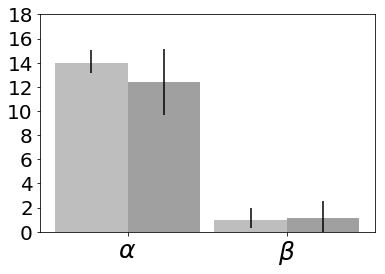

In [7]:
plt.bar([0,.5,1.1,1.6],all_data.Mean,color=['DarkGray','Gray'],alpha=0.75,width=0.5)
plt.errorbar([0,.5,1.1,1.6],all_data.Mean,yerr=[all_data.Mean-all_data.Lower,all_data.Upper-all_data.Mean],fmt='o', ecolor='black',markersize=0,markeredgecolor='gray', markerfacecolor='gray',capthick=2)
plt.ylim([0,18])
plt.yticks(fontsize=20)
plt.xticks([.25,1.35],[r'$\alpha$',r'$\beta$'],fontsize=25)
plt.show()
plt.close()